# 0. Import Library

In [2]:
# Import defined models, plots
from def_dict import *
from build_models import *
from plot_results import *

import os
import numpy as np

# 1. Data 

## 1-1 Load data that already splited and preprocessed

In [4]:
data_path = 'data/celeba_split/'
data_list = os.listdir(data_path)
print(data_list)
dataset = [np.load(data_path+data) for data in data_list[:2]]
x_data = np.concatenate(dataset)
print(x_data.shape)

['celeba_140000.npy', 'celeba_60000.npy', 'celeba_40000.npy', 'celeba_160000.npy', 'celeba_200000.npy', 'celeba_80000.npy', 'celeba_120000.npy', 'celeba_100000.npy', 'celeba_180000.npy', 'celeba_20000.npy']
(40000, 64, 64, 3)


## 1-2 Split dataset - train, test

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(x_data, train_size = 0.9)
print('* Training data shape: ', x_train.shape)
print('* Test data shape : ', x_test.shape)

* Training data shape:  (36000, 64, 64, 3)
* Test data shape :  (4000, 64, 64, 3)


# 2. Model
 * model : Develop encoder decoder model from **build_model.py** 
 * build_encoder_decoder(input_data) : get input data and make model

In [6]:
model = build_encoder_decoder(x_data)
model.summary()

Model: "EncoderDecoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 32)       

# 3. Training

## 3-1. Define and make save directory 

In [7]:
save_dir = 'results_ED/train_1'
if_not_make(save_dir)

## 3-2. Define options - Save models and loss,  Control learning rate

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau

# save model
checkpoint = ModelCheckpoint(filepath=save_dir+'/model.hdf5', monitor = 'val_loss', verbose=1, save_best_only=True)
# handle loss step
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
# save loss and acc
csv_logger = CSVLogger(save_dir+'/log.csv')

## 3-3. Compile model and training

In [9]:
model.compile(optimizer='adam', loss='mse')
model.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    validation_data=(x_test, x_test),
    callbacks = [checkpoint, reduce_lr, csv_logger]
    )

Epoch 1/10
140/141 [============================>.] - ETA: 0s - loss: 0.0442
Epoch 00001: val_loss improved from inf to 0.01385, saving model to results_ED/train_1/model.hdf5
141/141 [==============================] - 9s 66ms/step - loss: 0.0441 - val_loss: 0.0138 - lr: 0.0010
Epoch 2/10
140/141 [============================>.] - ETA: 0s - loss: 0.0110
Epoch 00002: val_loss improved from 0.01385 to 0.00887, saving model to results_ED/train_1/model.hdf5
141/141 [==============================] - 9s 66ms/step - loss: 0.0109 - val_loss: 0.0089 - lr: 0.0010
Epoch 3/10
140/141 [============================>.] - ETA: 0s - loss: 0.0080
Epoch 00003: val_loss improved from 0.00887 to 0.00736, saving model to results_ED/train_1/model.hdf5
141/141 [==============================] - 10s 68ms/step - loss: 0.0080 - val_loss: 0.0074 - lr: 0.0010
Epoch 4/10
140/141 [============================>.] - ETA: 0s - loss: 0.0070
Epoch 00004: val_loss improved from 0.00736 to 0.00662, saving model to results_

# 4. Results

* Get draw definition from **plot_resluts.py**
* plot_loss(save_dir)
* plot_recimg(model, input_data, save_dir)

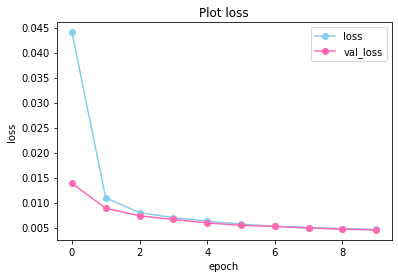

In [10]:
plot_loss(save_dir)

Save Image in results_ED/train_1


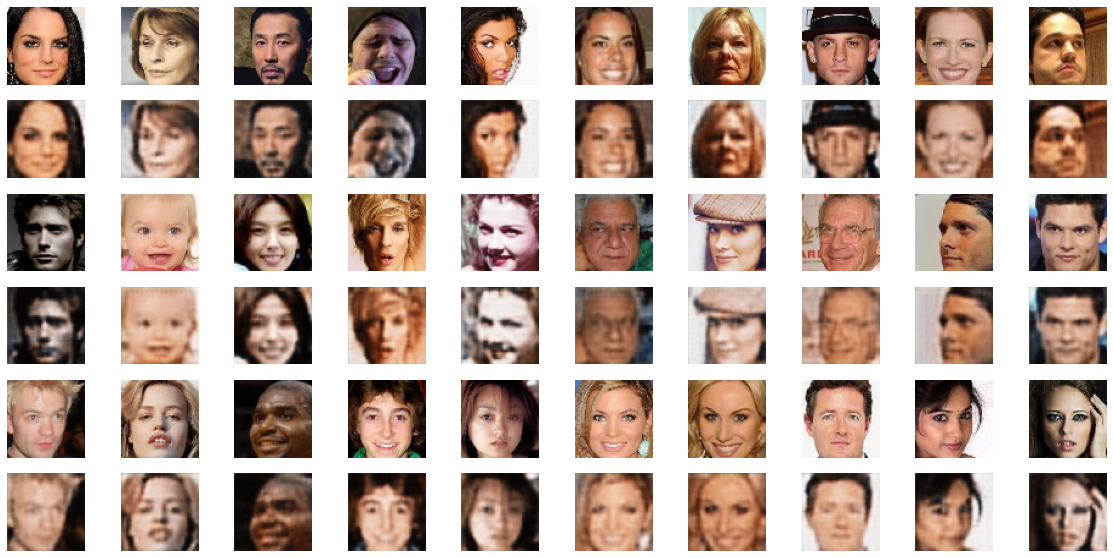

In [11]:
plot_recimg(model, x_test, save_dir)